In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
# X = bank_marketing.data.features 
# y = bank_marketing.data.targets 
  
# # metadata 
# print(bank_marketing.metadata) 
  
# # variable information 
# print(bank_marketing.variables) 
# data = pd.read_csv(bank_marketing.data_url)
# X
# Y
csv_url = bank_marketing.metadata.data_url

data = pd.read_csv(csv_url)


In [3]:
bank_marketing

{'data': {'ids': None,
  'features':        age           job   marital  education default  balance housing loan  \
  0       58    management   married   tertiary      no     2143     yes   no   
  1       44    technician    single  secondary      no       29     yes   no   
  2       33  entrepreneur   married  secondary      no        2     yes  yes   
  3       47   blue-collar   married        NaN      no     1506     yes   no   
  4       33           NaN    single        NaN      no        1      no   no   
  ...    ...           ...       ...        ...     ...      ...     ...  ...   
  45206   51    technician   married   tertiary      no      825      no   no   
  45207   71       retired  divorced    primary      no     1729      no   no   
  45208   72       retired   married  secondary      no     5715      no   no   
  45209   57   blue-collar   married  secondary      no      668      no   no   
  45210   37  entrepreneur   married  secondary      no     2971      no  

In [2]:
# printing dataset
data
# data.shape

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [3]:
data['education'].unique()
data

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


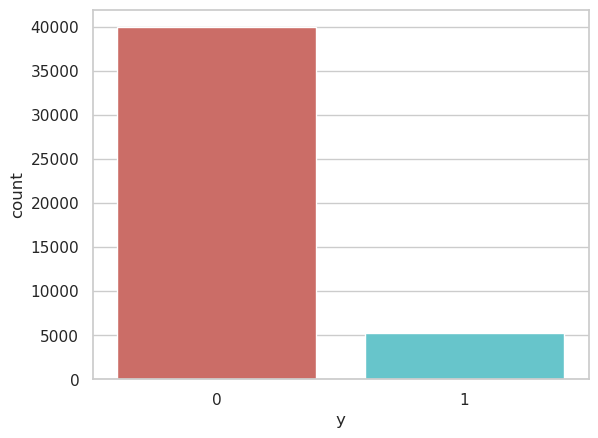

<Figure size 640x480 with 0 Axes>

In [165]:
data['y'].value_counts()
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plt')

In [5]:
count_no_sub = len(data[data.y=='no'])
count_sub = len(data[data['y']=='yes'])
print(count_no_sub)
print(count_sub)

39922
5289


In [6]:
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


In [31]:
data_ready = data
data.y = data_ready.y.replace('no', 0)
data.y = data_ready.y.replace('yes', 1)
data_ready

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,0


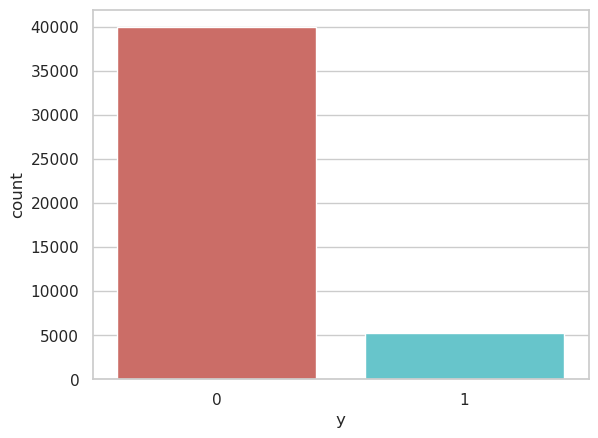

<Figure size 640x480 with 0 Axes>

In [32]:
data['y'].value_counts()
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plt')

In [75]:
df = pd.DataFrame(data)
df.groupby('y').mean(numeric_only=True)

,age,balance,day_of_week,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [77]:
data_ready.groupby('y').mean(numeric_only=True)

,age,balance,day_of_week,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [78]:
data_ready.groupby('job').mean(numeric_only=True)

,age,balance,day_of_week,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [79]:
data_ready.groupby('marital').mean(numeric_only=True)

,age,balance,day_of_week,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [80]:
data_ready.groupby('education').mean(numeric_only=True)

,age,balance,day_of_week,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064


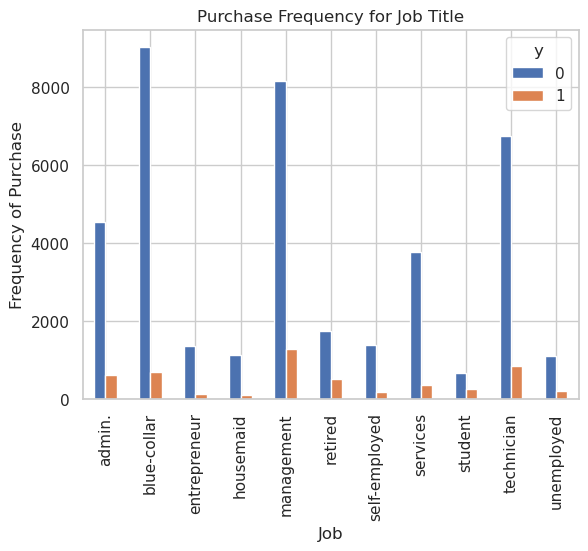

In [81]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

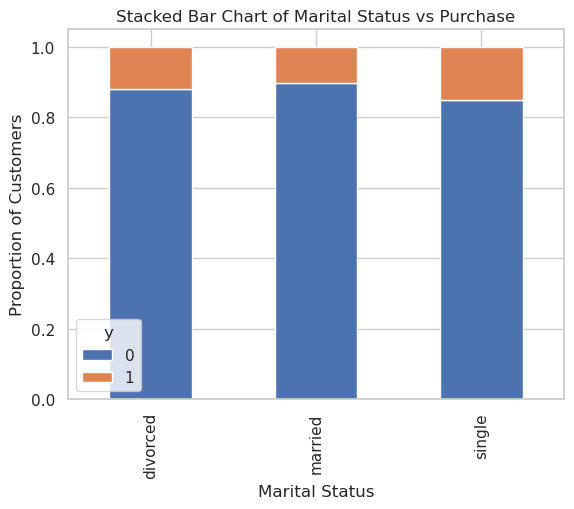

In [82]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

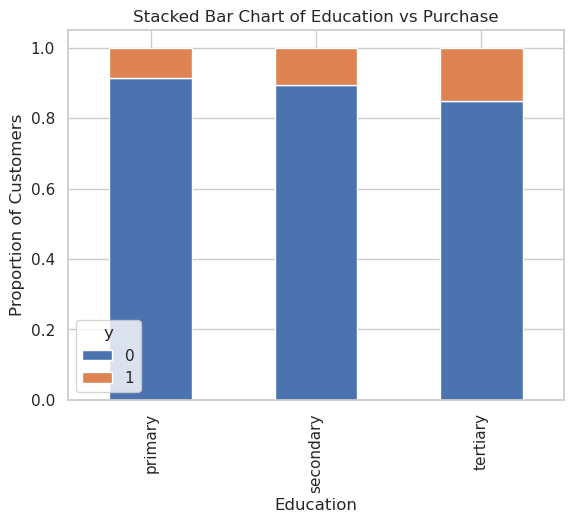

In [83]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

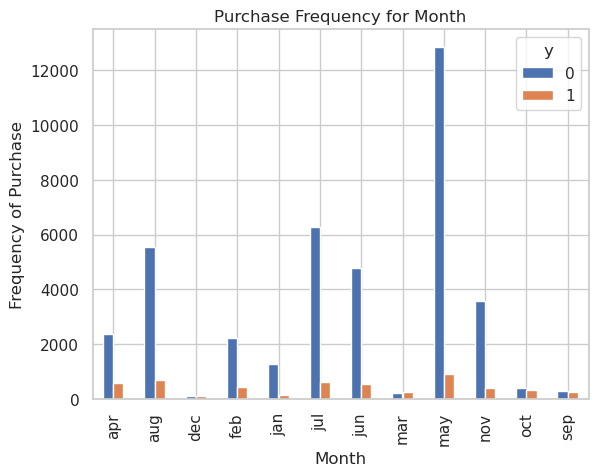

In [85]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

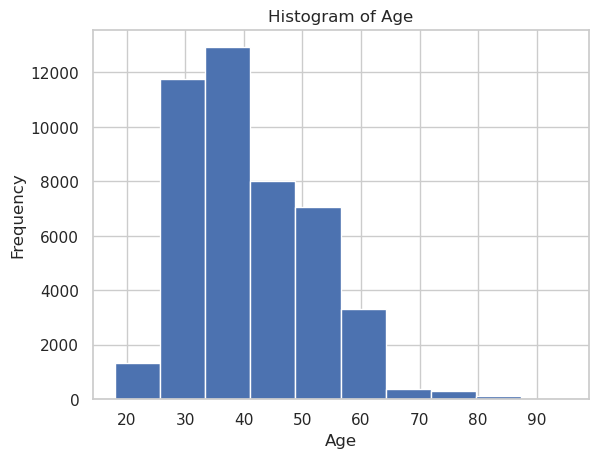

In [86]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

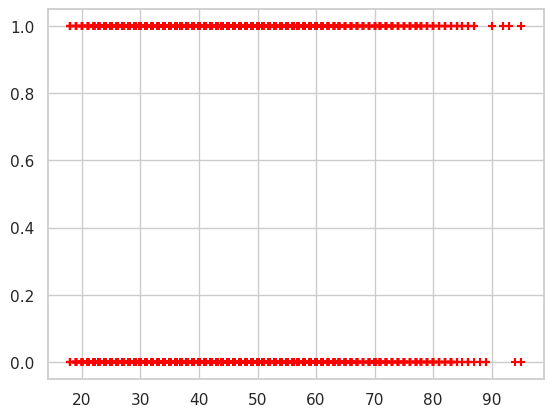

In [118]:
data_age = data[['age', 'y']].copy()
data_
data_age

plt.scatter(data_age.age, data_age.y,  marker='+', color='red') 

In [120]:
data_age.shape

(45211, 2)

In [121]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(data_age[['age']], data_age.y, test_size=0.1)

In [163]:
X_test.shape

(4522, 1)

In [154]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [155]:
model.fit(X_train, y_train)

LogisticRegression()

In [156]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
model.score(X_test, y_test)

0.8815358754313014